In [1]:
pip install pyodbc


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sqlite3
import numpy as np

In [3]:
# Create sqlite connection
sales = sqlite3.connect('chinook.db')

df = pd.read_sql_query("SELECT * FROM customer", sales)


In [4]:
#df['ID'] = df.index
#df.head()

In [5]:
#Create a data frame from a query. Return number track and percentage overalll
df = pd.read_sql_query( '''


SELECT genre.name AS genre, COUNT(track.track_id) AS num_of_track,

ROUND(count(track.track_id) * 100.0 /
            (select count(*) from track),2)  as Percentage
  FROM  genre
  JOIN  track
   ON  genre.genre_id = track.genre_id
  JOIN album
   ON track.album_id =album.album_id
 GROUP BY genre.name
ORDER by num_of_track DESC



'''
    
    
  
    , sales)

In [6]:
df.head()

,genre,num_of_track,Percentage
0,Rock,1297,37.03
1,Latin,579,16.53
2,Metal,374,10.68
3,Alternative & Punk,332,9.48
4,Jazz,130,3.71


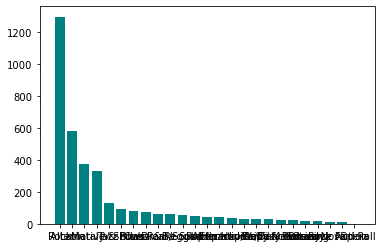

In [7]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=df.genre, height=df.num_of_track, color='teal')

# Display the plot
plt.show()

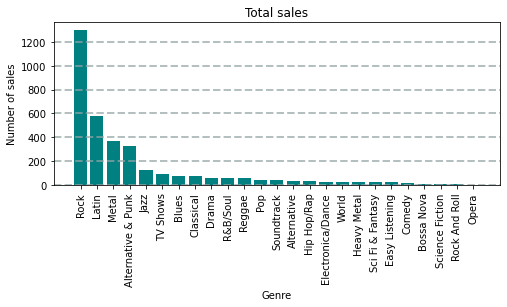

In [8]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=df.genre, height=df.num_of_track, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure. The figure is a graph reprensting number of track
plt.show()

In [9]:
# the

data = pd.read_sql_query(
'''

SELECT 
   genre.name AS genre, album.title as album, count(album.album_id) as num_of_album , artist.name as artist,
    
    ROUND(count(*) * 100.0 /
            (select count(*) from album),2 )  as Percentage
    
    FROM  genre
    JOIN  track
   ON  genre.genre_id = track.genre_id     
 join invoice_line as i_l
on i_l.track_id = track.track_id
 join invoice
 ON i_l.invoice_id = invoice.invoice_id
 JOIN album
 ON track.album_id = album.album_id
 JOIN artist
 ON album.artist_id = artist.artist_id
 group by album.album_id
 ORDER BY num_of_album DESC


''', sales)



In [10]:
top_list = data.head(10)
top_list

,genre,album,num_of_album,artist,Percentage
0,Rock,Are You Experienced?,187,Jimi Hendrix,53.89
1,Metal,Faceless,96,Godsmack,27.67
2,Metal,Mezmerize,93,System Of A Down,26.80
3,Alternative & Punk,Get Born,90,JET,25.94
4,Rock,The Doors,83,The Doors,23.92
5,Rock,The Police Greatest Hits,80,The Police,23.05
6,Rock,Greatest Hits I,80,Queen,23.05
7,Rock,Big Ones,80,Aerosmith,23.05
8,Rock,From The Muddy Banks Of The Wishkah [live],78,Nirvana,22.48
9,Rock,My Generation - The Very Best Of The Who,76,The Who,21.90


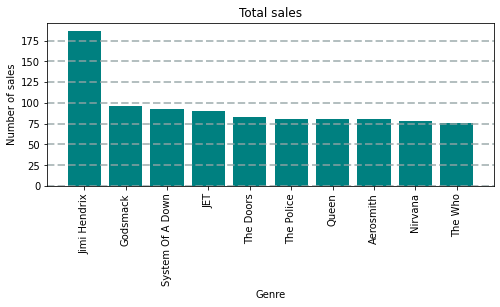

In [11]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=top_list.artist, height=top_list.num_of_album, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Genre')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

In [12]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=top_list.album, height=test.num_of_album, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('Albums')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

NameError: name 'test' is not defined

<Figure size 576x216 with 0 Axes>

In [ ]:
import seaborn as sb
sb.set()

In [ ]:
#data from query showing the total sale by city where country is UK
data_sales = pd.read_sql_query('''

SELECT i1.invoice_id, SUBSTRING(i1.invoice_date, 1, 10) as date, i1.billing_country, i1.billing_city,
ROUND(i1.total,2) as total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id >= i2.invoice_id
    where i1.billing_country in ('United Kingdom')
GROUP BY i1.invoice_id, i1.invoice_date, i1.total, i1.billing_country
--LIMIT 25
    


''', sales)


In [ ]:
data_sales.head(10)

In [ ]:
#Graph showing total sales over time
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot # plot plotly graphs in line in a notebook
init_notebook_mode(connected = True)
# line chart using plotly expess Scatter
trace = go.Scatter(
                    x = data_sales["date"],
                    y = data_sales["total"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(120, 26, 120, 0.8)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total Sales by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [ ]:
# calculate total sales by city.  Dates_sales represent the sale in Uk. 
#To Have all countries we need change the conditions in data sales
data_sales_city= pd.DataFrame(data_sales.groupby("billing_city") \
["total"].sum()).reset_index().rename({"total":"TotalSales"},axis=1)

In [ ]:
data_sales_city.head()

In [ ]:

#a pie representing sales by city. This case is in UK
import plotly.express as px # used for interactive visualizations

fig = px.pie(data_sales_city.head(),
             values="TotalSales",
             names="billing_city",
             title="Percent of Total Sales by city",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

customers analys

In [ ]:

#data frame from query showing sales by continent
data_customers = pd.read_sql_query(
 
'''
SELECT  customer.country, customer.city ,
       CASE
            WHEN customer.country in ('Canada', 'USA') then 'North_America'
            WHEN customer.country in ( 'France','Czech Republic','Austria','Belgium','Denmark' ,                     
               'Finland','Hungary','Ireland','Italy','Netherlands', 'Poland', 'Spain','Sweden', 'Norway',
              'Portugal','Germany', 'United Kingdom') then 'Europe'
            WHEN customer.country in ('Brazil', 'Chile', 'Argentina') then 'South_America'
            WHEN customer.country in ('India') then 'Asia'
            WHEN customer.country in  ('Australia') then 'Oceania'
            ELSE 'Other'
           
    END AS continent, ROUND(SUM(total),2) as total , SUBSTRING(invoice.invoice_date, 1 , 10) as date
    
FROM customer  
JOIN invoice
  ON customer.customer_id = invoice.customer_id

GROUP BY invoice.invoice_id , continent
--ORDER BY customers DESC





''', sales)
data_sales.head()

In [ ]:
#data_customers.head(10)
#asia
dfa = data_customers.where(data_customers['continent'] == "Asia").dropna()
#SouthAmerica
dsa = data_customers.where(data_customers['continent'] == "South_America").dropna()
#Europe
de = data_customers.where(data_customers['continent'] == "Europe").dropna()
#America
dna = data_customers.where(data_customers['continent'] == "North_America").dropna()
#oceania
doceania = data_customers.where(data_customers['continent'] == "Oceania").dropna()

In [ ]:
doceania

In [ ]:

#Graph comparing SouthAmerica and Asia
trace1 = go.Scatter(
                    x = dsa["date"],
                    y = dsa["total"],
                    mode = "lines+markers",
                    name = "SouthAmerica",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "#0E79B2"
                                 ),
                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
trace2 = go.Scatter(
                    x = dfa["date"],
                    y = dfa["total"],
                    mode = "lines+markers",
                    name = "Asia",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(242, 225, 39, 1)"
                                 ),

                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )


line_data = [trace1, trace2]

layout = dict(
              title = "Customers by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              #yaxis= dict(title= "sales"),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£"),
              legend=dict(
                          font = dict(size = 12),
                          yanchor = "top",
                          y=0.98,
                          x= 0.01
                         )
    
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)



In [ ]:
# line chart using plotly expess Scatter
#char for Oceania
trace = go.Scatter(
                    x = doceania["date"],
                    y = doceania["total"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(255, 165, 0, 0.8)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total Sales by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [ ]:
# line chart using plotly expess Scatter
#char for Europe. The last 12 months
trace = go.Scatter(
                    x = dsa.tail(12)["date"],
                    y = dsa["total"],
                    mode = "lines+markers",
                    name = "TotalSales",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "hsl(112, 21%, 74%)"
                                 ),
                    hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
line_data = [trace]
layout = dict(
              title = "Total sale las 12 months",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Period",ticklen = 5,zeroline = False),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£")
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)

In [ ]:
#pie chart for Soutth America
fig = px.pie(dsa,
             values="total",
             names="country",
             title="Percentage sale by city",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

sources : https://www.kaggle.com/code/atanaskanev/sales-analysis-and-visualization

In [ ]:
#data showing number customers by country
d_c = pd.read_sql_query(

'''
SELECT  customer.country, COUNT(distinct customer.customer_id) as customers, 
       ROUND(SUM(total),2) as total , COUNT(distinct invoice_id) as numb_ord
FROM customer  
JOIN invoice
  ON customer.customer_id = invoice.customer_id

GROUP BY country
ORDER BY customers DESC

''', sales )

In [ ]:
d_c.head()

In [ ]:
#pie chart for Soutth America
fig = px.pie(d_c,
             values="customers",
             names="country",
             title="Number customers by city",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

In [ ]:
#For the fun Try some test

In [ ]:
#testing overall sales cities
overall_sales = pd.read_sql_query(
'''
SELECT  customer.country, customer.city, 
       ROUND(SUM(total),2) as total 
FROM customer  
JOIN invoice
  ON customer.customer_id = invoice.customer_id

GROUP BY customer.city
ORDER BY total DESC




''', sales)

In [ ]:
#testing overall sales countries
osw = pd.read_sql_query(
'''
SELECT  customer.country, customer.city, 
       ROUND(SUM(total),2) as total 
FROM customer  
JOIN invoice
  ON customer.customer_id = invoice.customer_id

GROUP BY country
ORDER BY total DESC




''', sales)

In [ ]:
#barchart countries
# Create a Figure
fig = plt.figure(figsize=(15,6))

# Create a bar plot of name vs grade
plt.bar(x=osw.country, height=osw.total, color='pink')

# Customize the chart
plt.title('Total sales')
plt.xlabel('country')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

### below will be a barchart of city
# Create a Figure
fig = plt.figure(figsize=(15,6))

# Create a bar plot of name vs grade
plt.bar(x=overall_sales.city, height=overall_sales.total, color='Teal')

# Customize the chart
plt.title('Total sales')
plt.xlabel('city')
plt.ylabel('Number of sales')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Show the figure
plt.show()

# the graph show that USA is the top country but Prague in czech republic is the top city

In [ ]:
#Top 10 cities
def result(top, total):
    print('The overall sales for the 10 countries is: {}' .format(total) )
    return top 

top = overall_sales.head(10)
total = top['total'].sum()
result(top, total)

In [ ]:
#last 10 cities
last = overall_sales.tail(10)
total = last['total'].sum()
result(last, total)

In [ ]:
#pie chart for top 10.  The percent is for the 10 cities. 1490.94
fig = px.pie(top,
             values="total",
             names="city",
             title="Percentage top 10 cities",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

In [ ]:
#testing data last city
dlc = pd.read_sql_query(
'''
SELECT i1.invoice_id, SUBSTRING(i1.invoice_date, 1, 10) as date, i1.billing_country, i1.billing_city,
ROUND(i1.total,2) as total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id = i2.invoice_id
    WHERE i1.billing_city in ('Edmonton')
GROUP BY i1.invoice_id, i1.invoice_date, i1.billing_country



''', sales)

dlc.head()
# based on the previous data. Edmonton is the city with less sales

In [ ]:
#testing data top city
dtc = pd.read_sql_query(
'''
SELECT i1.invoice_id, SUBSTRING(i1.invoice_date, 1, 10) as date, i1.billing_country, i1.billing_city,
ROUND(i1.total,2) as total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id = i2.invoice_id
    WHERE i1.billing_city in ('Prague')
GROUP BY i1.invoice_id, i1.invoice_date, i1.billing_country



''', sales)

dtc.head()
# Prague is the city with most sales

In [ ]:
df_sales = pd.read_sql_query('''

SELECT i1.invoice_id, SUBSTRING(i1.invoice_date, 1, 10) as date, i1.billing_country, i1.billing_city,
ROUND(i1.total,2) as total
  FROM invoice i1
  JOIN invoice i2
    ON i1.invoice_id >= i2.invoice_id
    where i1.billing_city IN ('Paris') and i1.billing_country in ('France')
GROUP BY i1.invoice_id, i1.invoice_date, i1.total, i1.billing_city
--LIMIT 25
    


''', sales)
df_sales.head()

In [ ]:

#Graph comparing top city and last city
trace1 = go.Scatter(
                    x = dtc["date"],
                    y = dtc["total"],
                    mode = "lines+markers",
                    name = "Sell top city (Prague)",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "#0E79B2"
                                 ),
                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )
trace2 = go.Scatter(
                    x = dlc["date"],
                    y = dlc["total"],
                    mode = "lines+markers",
                    name = "Sell Last City (Edmonton)",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "rgba(242, 225, 39, 1)"
                                 ),

                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )


trace3 = go.Scatter(
                    x = df_sales["date"],
                    y = df_sales["total"],
                    mode = "lines+markers",
                    name = "Sell in Paris",
                    line = dict(width = 4),
                    marker = dict(
                                  size = 10,
                                  color = "Brown"
                                 ),

                     hovertemplate = " %{x}<br>£%{y:,.0f} <extra></extra>",
                  )


line_data = [trace1, trace2, trace3]

layout = dict(
              title = "Sell by Month",
              titlefont = dict(size = 20),
              margin=dict(l=10, r=50, b=10, t=70, pad=0),
              xaxis= dict(title= "Month",ticklen = 5,zeroline = False),
              #yaxis= dict(title= "sales"),
              yaxis= dict(title= "Total Sales", tickformat = ",.0f", tickprefix="£"),
              legend=dict(
                          font = dict(size = 12),
                          yanchor = "top",
                          y=0.98,
                          x= 0.01
                         )
    
             )
fig = dict(data = line_data, layout = layout)
iplot(fig)



In [ ]:
#Lets try a crazy fun

In [ ]:
result = pd.concat([dtc, dlc, df_sales])


In [ ]:
result.head()

In [ ]:
#pie chart for top 10.  The percent is for the 10 cities. 1490.94
fig = px.pie(result,
             values="total",
             names="billing_city",
             title="Percentage",
             color_discrete_sequence=px.colors.qualitative.G10
            )
# px.colors.qualitative.swatches().show() # see available color palettes

fig.update_traces(
                  textposition="inside",
                  textinfo="percent+label"
                 )
fig.update_layout(
                  margin=dict(l=10, r=50, b=10, t=70, pad=0),
                  titlefont = dict(size = 20)
                 )
iplot(fig)

In [ ]:
#WE concated the data of top city , last city and city of Paris. Draw a pie with percentage of sales